In [1]:
dev_name = "\u0938\u093F\u092E\u0930\u0928 \u092E\u0924\u092A\u093E\u0932"
print(dev_name)

सिमरन मतपाल


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [17]:
#load the data
df = pd.read_csv("employee_data.csv")
print("Shape of Dataset:", df.shape)

Shape of Dataset: (400, 5)


In [4]:
print("Missing Values(null values) in each feature:\n", df.isnull().sum())

Missing Values(null values) in each feature:
 ID                    0
Gender                2
Experience (Years)    2
Position              2
Salary                1
dtype: int64


In [5]:
# Count null values for each feature and then sum them up
print("total missing values(null values) in dataset: ", df.isnull().sum().sum())

total missing values(null values) in dataset:  7


In [6]:
print("Data Types:\n", df.dtypes)

Data Types:
 ID                      int64
Gender                 object
Experience (Years)    float64
Position               object
Salary                float64
dtype: object


In [7]:
print("Count of Zeros in each feature:\n", (df == 0).sum())

Count of Zeros in each feature:
 ID                     0
Gender                 0
Experience (Years)    17
Position               0
Salary                 0
dtype: int64


In [8]:
# Count zeros for each feature and then sum them up
print("count of total zeroes in dataset: ", (df==0).sum().sum())

count of total zeroes in dataset:  17


In [9]:
mean=df['Salary'].mean()
formatted_mean="{:.2f}".format(mean)
print("Mean score of salary of employees:", formatted_mean)

Mean score of salary of employees: 131838.15


In [10]:
print("maximum value of salary: ",df['Salary'].max() )
print("minimum value of salary: ",df['Salary'].min())

maximum value of salary:  269950.0
minimum value of salary:  43643.0


In [11]:
# Select numerical features
df_subset=df.select_dtypes(include=['number'])

In [12]:
# Compute the correlation matrix
correlation_matrix=df_subset.corr()
print("correlation matrix is: \n",correlation_matrix)

correlation matrix is: 
                           ID  Experience (Years)    Salary
ID                  1.000000            0.064326  0.005397
Experience (Years)  0.064326            1.000000  0.619316
Salary              0.005397            0.619316  1.000000


In [13]:

# Calculate the absolute correlation matrix and exclude self-correlations
correlation_matrix_abs = correlation_matrix.abs()
np.fill_diagonal(correlation_matrix_abs.values, np.nan)

# Find the pair with the maximum correlation
max_corr_pair = correlation_matrix_abs.unstack().idxmax()
max_corr_value = correlation_matrix_abs.unstack().max()

print("\nMaximum Correlation Pair:", max_corr_pair)
print("Maximum Correlation Value:", "{:.2f}".format(max_corr_value))



Maximum Correlation Pair: ('Experience (Years)', 'Salary')
Maximum Correlation Value: 0.62


In [14]:
# Extract features with the maximum correlation
x_feature, y_feature = max_corr_pair

# Subset the Data for the selected features
df_selected = df[[x_feature, y_feature]]

# Split the data

X_train, X_test, Y_train, Y_test = train_test_split(df_selected[x_feature],df_selected[y_feature], random_state=42, test_size=0.25)

training_x = X_train.shape[0]
testing_x = X_test.shape[0]
training_y = Y_train.shape[0]
testing_y = Y_test.shape[0]

print("the size of training dataset: ",(training_x, training_y))
print("the size of testing dataset:  ",(testing_x, testing_y))


the size of training dataset:  (300, 300)
the size of testing dataset:   (100, 100)


In [15]:
# Printing the training dataset (features and target)
print("Training dataset (features) : ")
print(X_train)
print("Training dataset (target) : ")
print(Y_train)
print("*" * 50)

# Printing the testing dataset (features and target)
print("Testing dataset (features) : ")
print(X_test)
print("Testing dataset (target) : ")
print(Y_test)


Training dataset (features) : 
247    3.0
110    9.0
16     4.0
66     9.0
153    8.0
      ... 
71     5.0
106    6.0
270    7.0
348    9.0
102    3.0
Name: Experience (Years), Length: 300, dtype: float64
Training dataset (target) : 
247    158031.0
110    147270.0
16     111156.0
66     186239.0
153    145530.0
         ...   
71     110321.0
106    135066.0
270    115263.0
348    115769.0
102     90049.0
Name: Salary, Length: 300, dtype: float64
**************************************************
Testing dataset (features) : 
209    11.0
280     5.0
33      3.0
210     4.0
93     16.0
       ... 
314    10.0
373    12.0
380     1.0
239    14.0
75      2.0
Name: Experience (Years), Length: 100, dtype: float64
Testing dataset (target) : 
209     93165.0
280     91842.0
33      97240.0
210     68000.0
93     128620.0
         ...   
314    150802.0
373    116966.0
380    110686.0
239     91480.0
75     141623.0
Name: Salary, Length: 100, dtype: float64


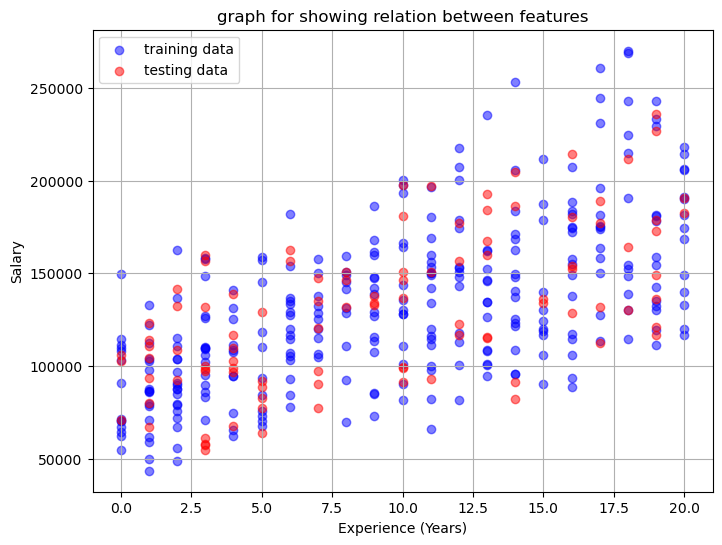

In [16]:
plt.figure(figsize=(8, 6))
plt.title("graph for showing relation between features")
plt.scatter(X_train, Y_train,color='blue' ,alpha=0.5,label="training data")
plt.scatter(X_test,Y_test,color='red' ,alpha=0.5,label="testing data")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.legend()
plt.grid(True)
plt.show()